In [49]:
import tensorflow as tf

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Fshion MNIST consist of 28*28 grayscale images of different types of clothing.
Task: Classification

In [51]:
#loding data

fashion_mnist=tf.keras.datasets.fashion_mnist

In [52]:
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data() # loading data in 4 parts

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
#since data sets are in grayscale from 0-255 will make is normalize dataset
#standarization 

x_train, x_test=x_train/255.0, x_test/255.0

In [55]:
x_test.shape

(10000, 28, 28)

x_train.shape is N(numbers)*H(Height)*W(Weight)  but

CNN requires a shape is N*H*W*C(Colors)

therfore we need to add a superfluous layers.

In [56]:
x_train=np.expand_dims(x_train,-1) # adding superfluous layers in train data
x_test=np.expand_dims(x_test,-1) # adding superfluous layer in test data

In [57]:
x_train.shape # now we have shape which required in CNN model

(60000, 28, 28, 1)

In [58]:
x_test.shape

(10000, 28, 28, 1)

In [59]:
#Number of classes 
K=len(set(y_train)) # uniques value 
print('Number of classes', K)

Number of classes 10


we will be using function API . why?

Code looks cleaner and compact.

it allow us to create branches .

it allow you to define model that can have multiple inputs and outputs

In [60]:
#what is inputs

x_train.shape # this includes number N=60000, which is number of images in data


(60000, 28, 28, 1)

In [61]:
x_train[0].shape # so if will remove N=60000 than rest would be our input image (28*28*1)

(28, 28, 1)

In [62]:
#Build the Model using functional API

In [69]:
i=Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3), strides=2, activation='relu')(i) #32/64 is output feature map,(3,3) is filter dimension

x=Conv2D(64,(3,3), strides=2, activation='relu')(x)

x=Conv2D(70,(3,3), strides=2, activation='relu')(x)

x= Flatten()(x)

x=Dropout(0.2)(x)   # output going to be 3D matrix but while feeding in nural required 1d matrix so thers is 2 way 1- flatten 2-Global max pulling
      #limitation of flatten is if "image sizes are diferent than it will not work howver in our case image size is 28*28(each image same size)
      #hence there will not any problem and will use flatten in thi case

#Dense Layers Nural Network design commences here-

x=Dense(512, activation='relu')(x) #output layer # 'relu' used for hidden layer

x=Dropout(0.2)(x)

x=Dense(K, activation='softmax')(x) #output layer , k is number of feature here which is 10, 'softmax' used for output layer

# once we have the vraiable representing the input 'i'
#and the variable representng the output 'x'
#we can pass these into the model() constructor

model=Model(i,x)





In [70]:
#Complie and fit 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy']
              )
r=model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5423 - accuracy: 0.8021 - val_loss: 0.4068 - val_accuracy: 0.8477
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3783 - accuracy: 0.8573 - val_loss: 0.3674 - val_accuracy: 0.8613
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3285 - accuracy: 0.8771 - val_loss: 0.3359 - val_accuracy: 0.8718
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2969 - accuracy: 0.8868 - val_loss: 0.3131 - val_accuracy: 0.8824
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2713 - accuracy: 0.8983 - val_loss: 0.2999 - val_accuracy: 0.8889
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2524 - accuracy: 0.9047 - val_loss: 0.2910 - val_accuracy: 0.8919
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2363 - accuracy: 0.9114 - val_loss: 0.2962 -

In [64]:
#Model has perform decent accuracy as 95 % 

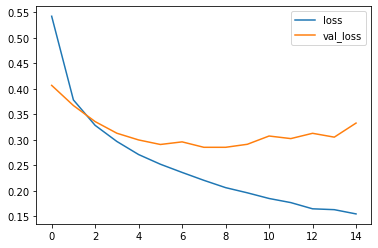

In [71]:
#plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history ['val_loss'],label='val_loss' )
plt.legend()

#in below graph model has been little bit overfited since we can see val loss going higher 

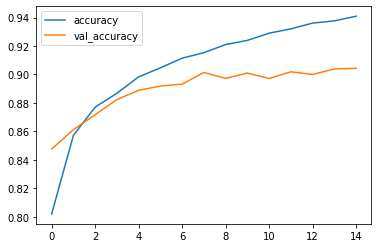

In [72]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history ['val_accuracy'],label='val_accuracy' )
plt.legend()